#### Load necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
%matplotlib inline

#### Load the datasets

In [2]:
df_1=pd.read_excel(r'C:\Users\asith\Downloads\Operation 1 Raw Data.xlsx',sheet_name='ADP')
df_2=pd.read_excel(r'C:\Users\asith\Downloads\Operation 1 Raw Data.xlsx',sheet_name='Investigation Intakes',header=1)
df_3=pd.read_excel(r'C:\Users\asith\Downloads\Operation 1 Raw Data.xlsx',sheet_name='Investigation Dispositions')
df_4=pd.read_excel(r'C:\Users\asith\Downloads\Operation 1 Raw Data.xlsx',sheet_name='Deficiencies')

In [3]:
df_1.dtypes

Year      int64
ADP     float64
dtype: object

([<matplotlib.axis.XTick at 0x1ce7f133948>,
 <a list of 3 Text xticklabel objects>)

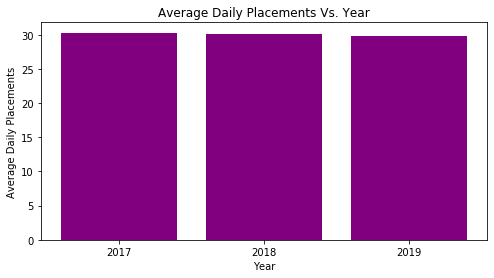

In [4]:
Year=[2017,2018,2019]
ADP=[30.3,30.1,29.8]

plt.figure(figsize=(8,4))
y_pos = np.arange(len(Year))

plt.bar(y_pos,ADP,color='purple',align='center')

plt.xlabel('Year')
plt.ylabel('Average Daily Placements')
plt.title('Average Daily Placements Vs. Year')
plt.xticks(y_pos, Year)


In [5]:
df_2.head()

,INVESTIGATION PRIORITY,INTAKE DATE,REPORTER RELATIONSHIP,VICTIM AGE AT INTAKE,VICTIM SEX,ALLEGATION,PERPETRATOR RELATIONSHIP
0,2,2020-04-27,Blank/Unknown,18.0,M,SXAB,Institut. Pers/vol.
1,2,2020-04-17,Other,17.0,M,NSUP,Institut. Pers/vol.
2,2,2020-04-17,Other,17.0,M,NSUP,Institut. Pers/vol.
3,2,2020-04-17,Other,17.0,M,NSUP,Institut. Pers/vol.
4,2,2020-04-17,Other,NaN,M,NSUP,Institut. Pers/vol.


#### Contingency table for 'VICTIM SEX' and 'ALLEGATION'

In [6]:
table_1=pd.crosstab(df_2['VICTIM SEX'],df_2['ALLEGATION'])
table_1

ALLEGATION,MDNG,NSUP,PHAB,SXAB
VICTIM SEX,,,,
M,1,50,11,10
U,1,7,2,1


#### Use Chi-Squared test

In [7]:
chi2_test = chi2_contingency(table_1)
print('P-value:{}'.format(chi2_test[1]))

P-value:0.4551947877482706


#### Year converted into the fiscal year

In [8]:
df_2.loc[(df_2['INTAKE DATE']>= '2019-09-01') & (df_2['INTAKE DATE'] <= '2020-08-31'),'FISCAL INTAKE YEAR'] =2020
df_2.loc[(df_2['INTAKE DATE']>= '2018-09-01') & (df_2['INTAKE DATE'] <= '2019-08-31'),'FISCAL INTAKE YEAR'] =2019
df_2.loc[(df_2['INTAKE DATE']>= '2017-09-01') & (df_2['INTAKE DATE'] <= '2018-08-31'),'FISCAL INTAKE YEAR'] =2018

In [9]:
df_2.dtypes

INVESTIGATION PRIORITY               int64
INTAKE DATE                 datetime64[ns]
REPORTER RELATIONSHIP               object
VICTIM AGE AT INTAKE               float64
VICTIM SEX                          object
ALLEGATION                          object
PERPETRATOR RELATIONSHIP            object
FISCAL INTAKE YEAR                 float64
dtype: object

#### Drop the fiscal year 2020

In [10]:
df_2_new=df_2[df_2['FISCAL INTAKE YEAR']!=2020]

#### 'FISCAL INTAKE YEAR' converted into int64

In [11]:
df_2_new['FISCAL INTAKE YEAR']=df_2_new['FISCAL INTAKE YEAR'].astype(np.int64)

C:\Users\asith\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Contingency table for 'FISCAL INTAKE YEAR' and 'ALLEGATION'

In [12]:
table2=pd.crosstab(df_2_new['FISCAL INTAKE YEAR'],df_2_new['ALLEGATION'],margins=True)
table2

ALLEGATION,MDNG,NSUP,PHAB,SXAB,All
FISCAL INTAKE YEAR,,,,,
2018,1,19,6,3,29
2019,0,10,6,4,20
All,1,29,12,7,49


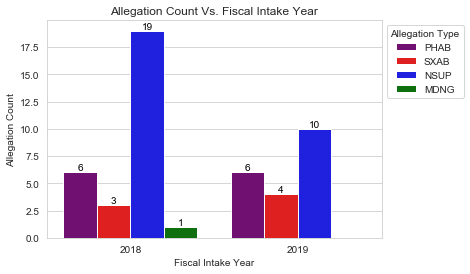

In [13]:
sns.set_style('whitegrid')

g=sns.countplot(x='FISCAL INTAKE YEAR',
              hue='ALLEGATION',
              data=df_2_new,
              palette=["purple","red","blue","green"])

g.set(xlabel='Fiscal Intake Year', ylabel='Allegation Count',title='Allegation Count Vs. Fiscal Intake Year')

leg=g.get_legend()

leg.set_title('Allegation Type')

leg.set_bbox_to_anchor([1,1])

for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()),
                        ha='center', va='bottom',color= 'black')

In [14]:
df_2_new['FISCAL INTAKE YEAR'].value_counts()

2018    29
2019    20
Name: FISCAL INTAKE YEAR, dtype: int64

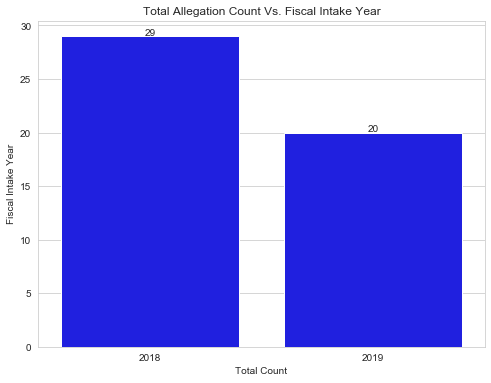

In [15]:
plt.figure(figsize=(8,6))

p=sns.countplot(x='FISCAL INTAKE YEAR',
                data=df_2_new,
                palette=["blue"])

p.set(xlabel='Total Count',ylabel='Fiscal Intake Year',title='Total Allegation Count Vs. Fiscal Intake Year')

for t in p.patches:
    height = t.get_height()
    p.text(t.get_x()+t.get_width()/2., height + 0.1,height ,ha="center")

#### Contingency table for 'FISCAL INTAKE YEAR' and 'PERPETRATOR RELATIONSHIP'

In [16]:
table_3=pd.crosstab(df_2_new['FISCAL INTAKE YEAR'],df_2_new['PERPETRATOR RELATIONSHIP'])
table_3.T

FISCAL INTAKE YEAR,2018,2019
PERPETRATOR RELATIONSHIP,,
Institut. Pers/vol.,19,15
Other,1,0
Unknown,2,0


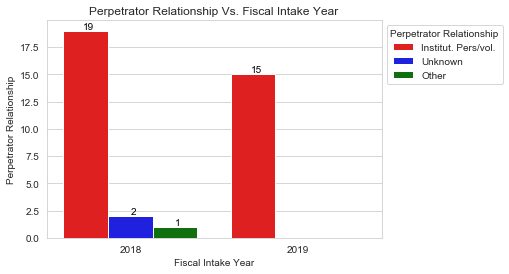

In [17]:
sns.set_style('whitegrid')

v=sns.countplot(x='FISCAL INTAKE YEAR',
              hue='PERPETRATOR RELATIONSHIP',
              data=df_2_new,
              palette=["red","blue","green"])

v.set(xlabel='Fiscal Intake Year', ylabel='Perpetrator Relationship',title='Perpetrator Relationship Vs. Fiscal Intake Year')

leg=v.get_legend()

leg.set_title('Perpetrator Relationship')

leg.set_bbox_to_anchor([1,1])

for p in v.patches:
        v.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()),
                        ha='center', va='bottom',color= 'black')

In [18]:
df_3.head()

,Date Investigation Opened,Date Investigation Closed,Allegation Type,Allegation Disposition
0,2020-04-18,2020-05-28,Neglectful Supervision,Ruled Out
1,2020-04-18,2020-05-28,Neglectful Supervision,Ruled Out
2,2020-04-18,2020-05-28,Neglectful Supervision,Ruled Out
3,2020-04-18,2020-05-28,Neglectful Supervision,Ruled Out
4,2020-04-18,2020-05-28,Neglectful Supervision,Ruled Out


#### Contingency table for 'Allegation Type' and 'Allegation Disposition'

In [19]:
table_4=pd.crosstab(df_3['Allegation Type'],df_3['Allegation Disposition'],margins=True)
table_4.T

Allegation Type,Emotional Abuse,Exploitation,Medical Neglect,Neglectful Supervision,Physical Abuse,Sexual Abuse,All
Allegation Disposition,,,,,,,
Admin Closure,0,1,1,2,0,1,5
Reason to Believe,0,0,0,7,2,3,12
Ruled Out,1,1,8,139,25,18,192
All,1,2,9,148,27,22,209


In [20]:
df_3.dtypes

Date Investigation Opened    datetime64[ns]
Date Investigation Closed    datetime64[ns]
Allegation Type                      object
Allegation Disposition               object
dtype: object

In [21]:
df_3['Date Investigation Opened']=pd.to_datetime(df_3['Date Investigation Opened'])

#### Year converted into the fiscal year

In [22]:
df_3.loc[(df_3['Date Investigation Opened']>= '2019-09-01') & (df_3['Date Investigation Opened'] <= '2020-08-31'),'Fiscal Year Investigation Opened'] =2020
df_3.loc[(df_3['Date Investigation Opened']>= '2018-09-01') & (df_3['Date Investigation Opened'] <= '2019-08-31'),'Fiscal Year Investigation Opened'] =2019
df_3.loc[(df_3['Date Investigation Opened']>= '2017-09-01') & (df_3['Date Investigation Opened'] <= '2018-08-31'),'Fiscal Year Investigation Opened'] =2018
df_3.loc[(df_3['Date Investigation Opened']>= '2016-09-01') & (df_3['Date Investigation Opened'] <= '2017-08-31'),'Fiscal Year Investigation Opened'] =2017
df_3.loc[(df_3['Date Investigation Opened']>= '2015-09-01') & (df_3['Date Investigation Opened'] <= '2016-08-31'),'Fiscal Year Investigation Opened'] =2016
df_3.loc[(df_3['Date Investigation Opened']>= '2014-09-01') & (df_3['Date Investigation Opened'] <= '2015-08-31'),'Fiscal Year Investigation Opened'] =2015
df_3.loc[(df_3['Date Investigation Opened']>= '2013-09-01') & (df_3['Date Investigation Opened'] <= '2014-08-31'),'Fiscal Year Investigation Opened'] =2014

In [23]:
df_3.dtypes

Date Investigation Opened           datetime64[ns]
Date Investigation Closed           datetime64[ns]
Allegation Type                             object
Allegation Disposition                      object
Fiscal Year Investigation Opened           float64
dtype: object

#### Select data for the fiscal year 2017,2018, and 2019

In [24]:
df_3_new=df_3[(df_3['Fiscal Year Investigation Opened']==2019) | (df_3['Fiscal Year Investigation Opened']==2018) | (df_3['Fiscal Year Investigation Opened']==2017)]

In [25]:
df_3_new['Fiscal Year Investigation Opened']=df_3_new['Fiscal Year Investigation Opened'].astype(np.int64)

C:\Users\asith\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Calculate the percentage for the contingency table

In [26]:
table_5=pd.crosstab(df_3_new['Fiscal Year Investigation Opened'],df_3_new['Allegation Disposition']).apply(lambda r:r/r.sum(),axis=1)
table_5.T


Fiscal Year Investigation Opened,2017,2018,2019
Allegation Disposition,,,
Admin Closure,0.022222,0.03125,0.041667
Reason to Believe,0.022222,0.12500,0.000000
Ruled Out,0.955556,0.84375,0.958333


#### Calculate the total count for the contingency table

In [27]:
table_6=pd.crosstab(df_3_new['Fiscal Year Investigation Opened'],df_3_new['Allegation Disposition'],margins=True)
table_6.T

Fiscal Year Investigation Opened,2017,2018,2019,All
Allegation Disposition,,,,
Admin Closure,1,1,2,4
Reason to Believe,1,4,0,5
Ruled Out,43,27,46,116
All,45,32,48,125


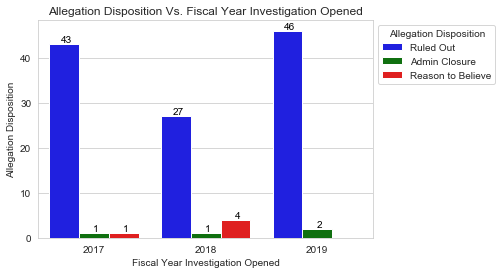

In [28]:
sns.set_style('whitegrid')

g=sns.countplot(x='Fiscal Year Investigation Opened',
              hue='Allegation Disposition',
              data=df_3_new,
              palette=["blue","green","red"])

g.set(xlabel='Fiscal Year Investigation Opened', ylabel='Allegation Disposition',title='Allegation Disposition Vs. Fiscal Year Investigation Opened')

leg=g.get_legend()

leg.set_title('Allegation Disposition')

leg.set_bbox_to_anchor([1,1])

for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()),
                        ha='center', va='bottom',color= 'black')

In [29]:
df_3_new['Number_of_Day_for_Investigation']=(df_3_new['Date Investigation Closed']-df_3_new['Date Investigation Opened']).dt.days

C:\Users\asith\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df_3_new.dtypes

Date Investigation Opened           datetime64[ns]
Date Investigation Closed           datetime64[ns]
Allegation Type                             object
Allegation Disposition                      object
Fiscal Year Investigation Opened             int64
Number_of_Day_for_Investigation              int64
dtype: object

In [31]:
df_3_new.head()

,Date Investigation Opened,Date Investigation Closed,Allegation Type,Allegation Disposition,Fiscal Year Investigation Opened,Number_of_Day_for_Investigation
13,2019-06-13,2020-04-24,Sexual Abuse,Ruled Out,2019,316
14,2019-06-13,2020-04-24,Sexual Abuse,Ruled Out,2019,316
15,2019-07-01,2020-04-24,Medical Neglect,Ruled Out,2019,298
16,2019-07-01,2020-04-24,Neglectful Supervision,Ruled Out,2019,298
17,2019-07-01,2020-04-24,Medical Neglect,Ruled Out,2019,298


In [32]:
df_3_new.groupby('Fiscal Year Investigation Opened').Number_of_Day_for_Investigation.mean()

Fiscal Year Investigation Opened
2017     98.733333
2018    194.718750
2019    223.104167
Name: Number_of_Day_for_Investigation, dtype: float64

In [33]:
df_4.head()

,Activity Type (Inspection / Investigation / Assessment),"Activity ID (Inspection ID, Assessment ID, Investigation Number )",Type (Inspection Type / Assessment Type),Activity Date,Standard Cited,Standard Weight,Citation Status (Admin Review Status),Standard Description
0,Investigation,2573857,NaN,2019-12-02 00:00:00,748.683(1),Medium,Waived,Caregiver Supervision-Provide oversight of car...
1,Investigation,2567054,NaN,2019-11-05 00:00:00,748.1693(a)(1),High,Waived,"Nutrition-Provide food of adequate variety, qu..."
2,Investigation,2567054,NaN,2019-11-05 00:00:00,748.3301(a),High,Waived,Physical Site-Buildings must be structurally s...
3,Inspection,3764325,Monitoring Inspection,2019-10-28 16:30:00,748.1205(a)(1),Medium Low,Waived,"Admission Documentation-Includes child's name,..."
4,Inspection,3764325,Monitoring Inspection,2019-10-28 16:30:00,748.1205(a)(4),Low,Waived,"Admission Documentation-Includes names, addres..."


#### Contingency table for 'Standard Weight' and 'Citation Status (Admin Review Status)'

In [34]:
table_7=pd.crosstab(df_4['Standard Weight'],df_4['Citation Status (Admin Review Status)'])
table_7

Citation Status (Admin Review Status),Upheld,Waived
Standard Weight,,
High,2,60
Low,0,16
Medium,1,23
Medium High,3,49
Medium Low,1,16


#### Use Chi-Squared test

In [35]:
chi2_test = chi2_contingency(table_7)
print('P-value:{}'.format(chi2_test[1]))

P-value:0.8592300854794211


In [36]:
df_4.loc[(df_4['Activity Date']>= '2019-09-01') & (df_4['Activity Date'] <= '2020-08-31'),'Activity Year'] =2020
df_4.loc[(df_4['Activity Date']>= '2018-09-01') & (df_4['Activity Date'] <= '2019-08-31'),'Activity Year'] =2019
df_4.loc[(df_4['Activity Date']>= '2017-09-01') & (df_4['Activity Date'] <= '2018-08-31'),'Activity Year'] =2018
df_4.loc[(df_4['Activity Date']>= '2016-09-01') & (df_4['Activity Date'] <= '2017-08-31'),'Activity Year'] =2017
df_4.loc[(df_4['Activity Date']>= '2015-09-01') & (df_4['Activity Date'] <= '2016-08-31'),'Activity Year'] =2016
df_4.loc[(df_4['Activity Date']>= '2014-09-01') & (df_4['Activity Date'] <= '2015-08-31'),'Activity Year'] =2015
df_4.loc[(df_4['Activity Date']>= '2013-09-01') & (df_4['Activity Date'] <= '2014-08-31'),'Activity Year'] =2014

In [37]:
df_4['Activity Year']=df_4['Activity Year'].astype(np.int64)


#### Select data for the fiscal year 2017,2018, and 2019

In [38]:
df_4_new=df_4[(df_4['Activity Year']==2019) | (df_4['Activity Year']==2018) | (df_4['Activity Year']==2017)]

#### Contingency table for 'Activity Year' and 'Citation Status (Admin Review Status)'

In [39]:
table_8=pd.crosstab(df_4_new['Activity Year'],df_4_new['Citation Status (Admin Review Status)'],margins=True)
table_8.T

Activity Year,2017,2018,2019,All
Citation Status (Admin Review Status),,,,
Upheld,2,1,4,7
Waived,38,21,64,123
All,40,22,68,130


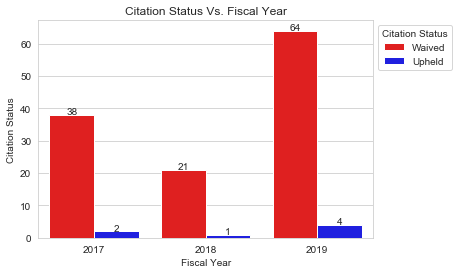

In [43]:
#fig, ax1 = plt.subplots(figsize=(3,2))

sns.set_style('whitegrid')

p=sns.countplot(x='Activity Year',
              hue='Citation Status (Admin Review Status)',
              data=df_4_new,
              palette=["red", "blue"])

p.set(xlabel='Fiscal Year', ylabel='Citation Status',title='Citation Status Vs. Fiscal Year')

leg=p.get_legend()

leg.set_title('Citation Status')

leg.set_bbox_to_anchor([1,1])

for t in p.patches:
    height = t.get_height()
    p.text(t.get_x()+t.get_width()/2., height + 0.1,height ,ha="center")

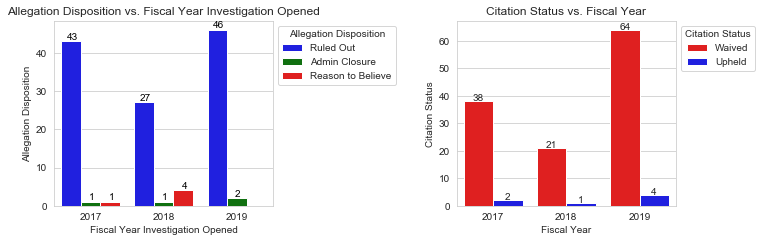

In [41]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(11,4))

p=sns.countplot(x='Activity Year',
              hue='Citation Status (Admin Review Status)',
              data=df_4_new,
              palette=["red", "blue"],
              ax=ax2)
p.set(xlabel='Fiscal Year', ylabel='Citation Status',title='Citation Status vs. Fiscal Year')
leg=p.get_legend()
leg.set_title('Citation Status')
leg.set_bbox_to_anchor([1,1])
for t in p.patches:
    height = t.get_height()
    p.text(t.get_x()+t.get_width()/2., height + 0.1,height ,ha="center")
    

g=sns.countplot(x='Fiscal Year Investigation Opened',
              hue='Allegation Disposition',
              data=df_3_new,
              palette=["blue","green","red"],
              ax=ax1)
g.set(xlabel='Fiscal Year Investigation Opened', ylabel='Allegation Disposition',title='Allegation Disposition vs. Fiscal Year Investigation Opened')
leg=g.get_legend()
leg.set_title('Allegation Disposition')
leg.set_bbox_to_anchor([1,1])
for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()),
                        ha='center', va='bottom',color= 'black')
fig.tight_layout(pad=3.0)

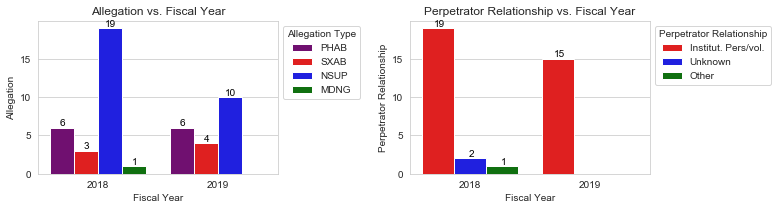

In [44]:
fig,(ax3,ax4)=plt.subplots(1,2,figsize=(11,3))

g=sns.countplot(x='FISCAL INTAKE YEAR',
              hue='ALLEGATION',
              data=df_2_new,
              palette=["purple","red","blue","green"],
              ax=ax3)
g.set(xlabel='Fiscal Year', ylabel='Allegation',title='Allegation vs. Fiscal Year')
leg=g.get_legend()
leg.set_title('Allegation Type')
leg.set_bbox_to_anchor([1,1])
for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()),
                        ha='center', va='bottom',color= 'black')

        
v=sns.countplot(x='FISCAL INTAKE YEAR',
              hue='PERPETRATOR RELATIONSHIP',
              data=df_2_new,
              palette=["red","blue","green"],
              ax=ax4)
v.set(xlabel='Fiscal Year', ylabel='Perpetrator Relationship',title='Perpetrator Relationship vs. Fiscal Year')
leg=v.get_legend()
leg.set_title('Perpetrator Relationship')
leg.set_bbox_to_anchor([1,1])
for p in v.patches:
        v.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()),
                        ha='center', va='bottom',color= 'black')
fig.tight_layout(pad=1.0)